### Random Walks Code

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import stan

try:
    import arviz as az
except ImportError as err:
    print("Please, install arviz for easy visualization of Stan models.")

import nest_asyncio
nest_asyncio.apply()

import pandas as pd

In [4]:
def simulate_discrete_rw(T = 1000):

    x = np.zeros(shape = T)

    for t in range(1,T):
        w = np.random.randint(low = 0, high = 2) * 2 - 1
        #w = np.random.normal(0,1)
        x[t] = x[t-1] + w
    return x



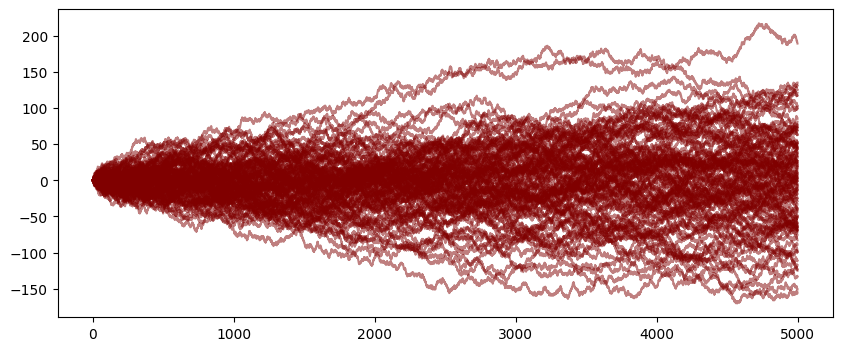

In [5]:
num_walks = 100
f, ax = plt.subplots(1,1,figsize=(10,4))

for _ in range(num_walks):
    x = simulate_discrete_rw(T = 5000)
    ax.plot(x, color = 'maroon', alpha = 0.5)

In [6]:
def simulate_random_walk(T : int =100, sigma : float =1.0) -> np.array:

    """Simulates one realization of a discrete random walk process.
    
    Parameters:
    -----------

    T     : int, optional (default: 100)
        The time horizon of te process
    sigma : float, optional (default : 1.0)
        The scale 

    Returns:
    --------
    x : np.ndarray of shape (T, )
        An array containing the simulated random walk trajectory
    """
    x = np.zeros(shape = T)
    for t in range(1, T):
        x[t] = sigma * np.random.normal(0, 1) + x[t-1]
    return x



In [7]:
def simulate_random_walk_noloop(T=100, sigma=1.0):
    x = np.random.normal(loc = 0, scale = sigma, size = T)

    x[0] = 0

    x = np.cumsum(x)

    return x

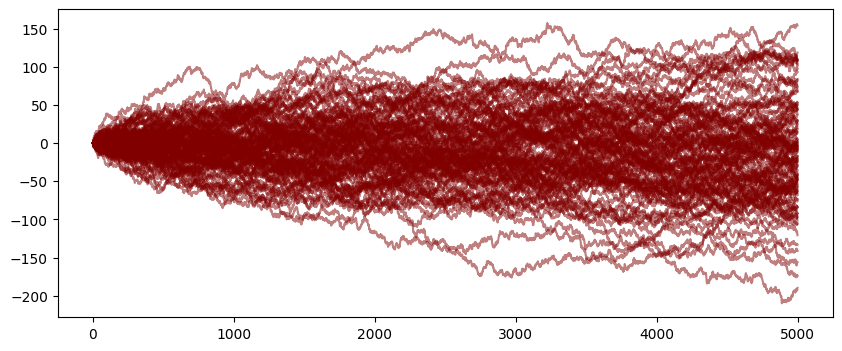

In [8]:
num_walks = 100
f, ax = plt.subplots(1,1,figsize=(10,4))

for _ in range(num_walks):
    x = simulate_random_walk(T = 5000)
    ax.plot(x, color = 'maroon', alpha = 0.5)

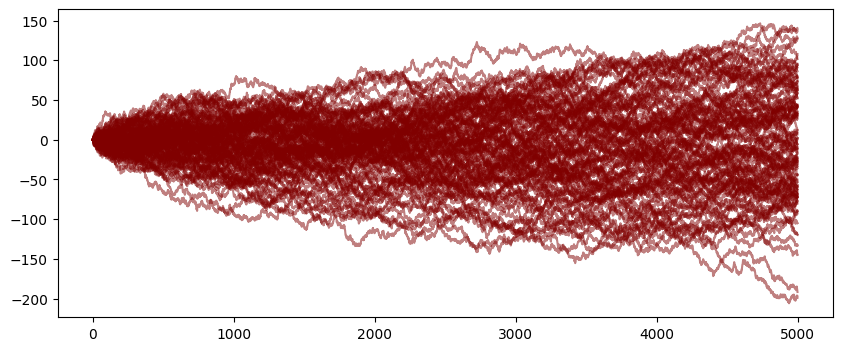

In [9]:
num_walks = 100
f, ax = plt.subplots(1,1,figsize=(10,4))

for _ in range(num_walks):
    x = simulate_random_walk_noloop(T = 5000)
    ax.plot(x, color = 'maroon', alpha = 0.5)

# Coding Up the diffusion model

In [47]:
def simulate_diffusion(v, a, beta, tau, dt = 1e-3, scale = 1.0, max_time = 10.):
    sigma = scale
    t = tau
    num_samples = np.ceil(max_time / dt).astype(int)
    x = np.zeros(shape = num_samples)
    x[0] = beta
    t += dt
    
    i = 1
    while(t <= max_time and i < num_samples and x[i - 1] < a and x[i - 1] > 0):
        x[i] = x[i - 1] + v*dt + sigma*np.sqrt(dt)*np.random.normal(0, 1)
        t += dt
        i += 1

    return x[:i]

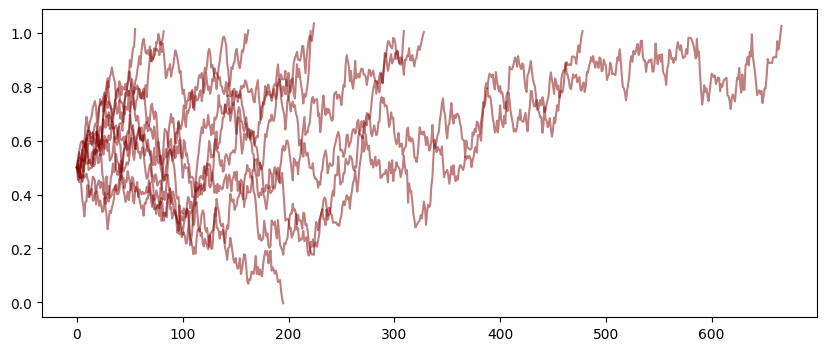

In [48]:
num_walks = 10
f, ax = plt.subplots(1,1,figsize=(10,4))

for _ in range(num_walks):
    x = simulate_diffusion(1, 1, 0.5, 0, dt = 1e-3, scale = 1.0, max_time = 10.)
    ax.plot(x, color = 'maroon', alpha = 0.5)

In [ ]:
def gen_diffuse_distribution(params=[1,1,0.5,0,1e-3,1.0,10.0], num_realizations=100):
    distribution = []
    for _ in range(num_realizations):
        distribution.append(simulate_diffusion(*params).shape[0])
    
    return distribution

Text(0, 0.5, 'Frequency')

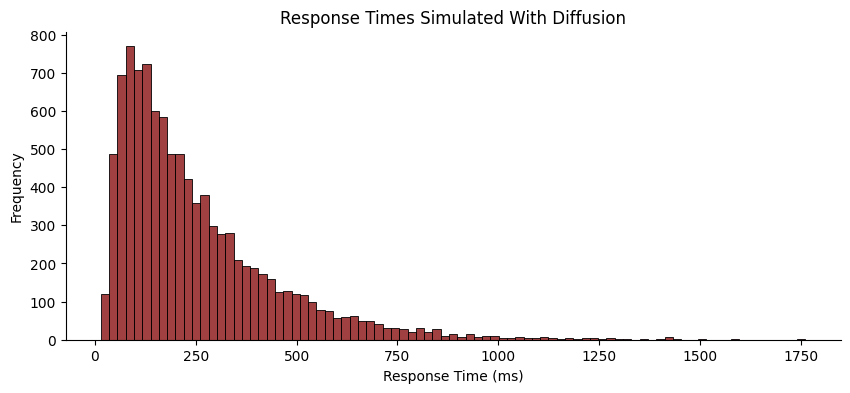

In [70]:
distribution = gen_diffuse_distribution(num_realizations=10000)

fig, ax = plt.subplots(1,1,figsize=(10,4))
sns.histplot(distribution, color="maroon", ax=ax)
sns.despine(ax=ax)
ax.set_title("Response Times Simulated With Diffusion")
ax.set_xlabel("Response Time (ms)")
ax.set_ylabel("Frequency")

In [ ]:
response_data = pd.read_csv("rt_example_data.csv", delimiter=";", )